In [46]:
import pandas as pd
import matplotlib as plt

In [47]:
games = pd.read_csv("vgsales-12-4-2019-short.csv")

what are the top 3 nintendo games that recieved the most critic scores greater than a 7.

Create a box plot for distribution of total shipped for the sega, activition and ubisoft publishers

what is the platform, publisher and name of the game that culd be considered an outlier
remove the outlier from the df

re create boxplot with outlier removed

In [48]:
games.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

In [49]:
games.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000


# display the row with the total shipped outlier,\
# display a boxplot of the distribution of total shipped for Wii platform games

In [50]:
games.loc[games.Total_Shipped == games.Total_Shipped.max()]

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0


<AxesSubplot:>

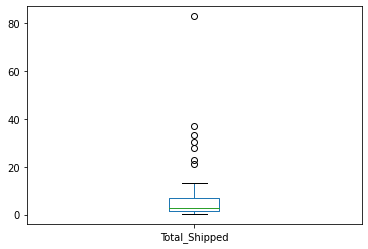

In [51]:
games.loc[games.Platform == "Wii"].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")

In [52]:
games.loc[(games.Critic_Score > 7) | (games.Publisher == "Nintendo")]["Name"].value_counts()[:3]

Madden NFL 07                 8
LEGO Batman: The Videogame    8
FIFA 07 Soccer                7
Name: Name, dtype: int64

Create a box plot for distribution of total shipped for the sega, activition and ubisoft publishers


In [53]:
games.Publisher

0                Nintendo
1                Nintendo
2                Nintendo
3        PUBG Corporation
4                Nintendo
               ...       
55787           505 Games
55788     Mooneye Studios
55789     Mooneye Studios
55790     Mooneye Studios
55791             Unknown
Name: Publisher, Length: 55792, dtype: object

<AxesSubplot:>

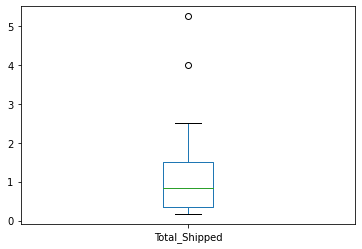

In [54]:
games.loc[(games.Publisher == "Ubisoft") ].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")

<AxesSubplot:>

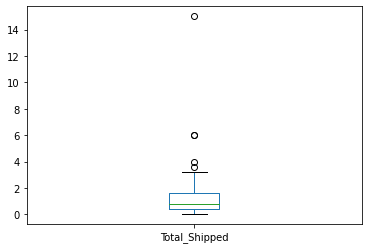

In [55]:
games.loc[(games.Publisher == "Sega") ].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")

<AxesSubplot:>

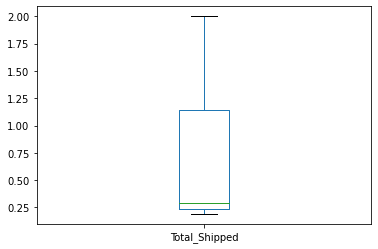

In [56]:
games.loc[(games.Publisher == "Activision") ].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")

what is the platform, publisher and name of the game that could be considered an outlier remove the outlier from the df

re create boxplot with outlier removed

In [57]:
q1 = games["Total_Shipped"].quantile(0.25)
q3 = games["Total_Shipped"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

upper_bound

4.2

In [58]:
games.drop(games.loc[games["Total_Shipped"] > upper_bound].index, inplace = True)

<AxesSubplot:>

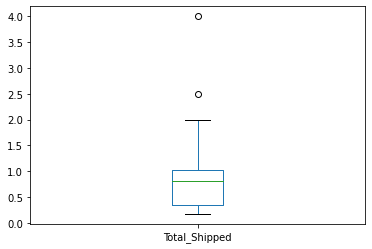

In [62]:
games.loc[(games.Publisher == "Ubisoft")].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")

<AxesSubplot:>

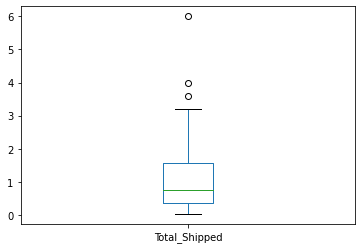

In [60]:
games.loc[(games.Publisher == "Sega") ].groupby("Total_Shipped")["Total_Shipped"].sum().plot(kind = "box")